Import necessary packages: Numpy, Pandas, matplotlib

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Mount your google drive (if you have a google account) or upload files (go on the file icon on the left -> right click). Copy path of zip.train and zip.test and load them as numpy arrays using the following code (insert the path as string).

In [2]:
path_to_train = '/Users/Eva/Downloads/zip.train'
path_to_test = '/Users/Eva/Downloads/zip.test'
training_data = np.array(pd.read_csv(path_to_train, sep=' ', header=None))
test_data = np.array(pd.read_csv(path_to_test, sep =' ',header=None))

X_train, y_train = training_data[:,1:-1], training_data[:,0]
X_test, y_test = test_data[:,1:], test_data[:,0]

# We only want to classify two different digits. You can choose which digits you want to classify youself

X_train = X_train[np.logical_or(y_train == 1, y_train == 9)]
X_test = X_test[np.logical_or(y_test == 1, y_test == 9)]
y_train = y_train[np.logical_or(y_train == 1, y_train == 9)]
y_test = y_test[np.logical_or(y_test == 1, y_test == 9)]

In [3]:
print("Train shapes: ", X_train.shape, y_train.shape, "Test shapes: ", X_test.shape, y_test.shape)

Train shapes:  (1649, 256) (1649,) Test shapes:  (441, 256) (441,)


In [4]:
def show_numbers(X):
    num_samples = 90
    indices = np.random.choice(range(len(X)), num_samples)
    print(indices.shape)
    sample_digits = X[indices]

    fig = plt.figure(figsize=(20, 6))

    for i in range(num_samples):
        ax = plt.subplot(6, 15, i + 1)
        img = 1-sample_digits[i].reshape((16, 16)) 
        plt.imshow(img, cmap='gray')
        plt.axis('off')

def show_few_numbers(Xi):
    fig = plt.figure(figsize=(10, 6))
    i = 1
    for X in Xi:
        ax = plt.subplot(len(Xi)//10 + 1, 10, i)
        plt.imshow(1-X.reshape((16, 16)), cmap='gray')
        plt.axis('off')
        i += 1

(90,)


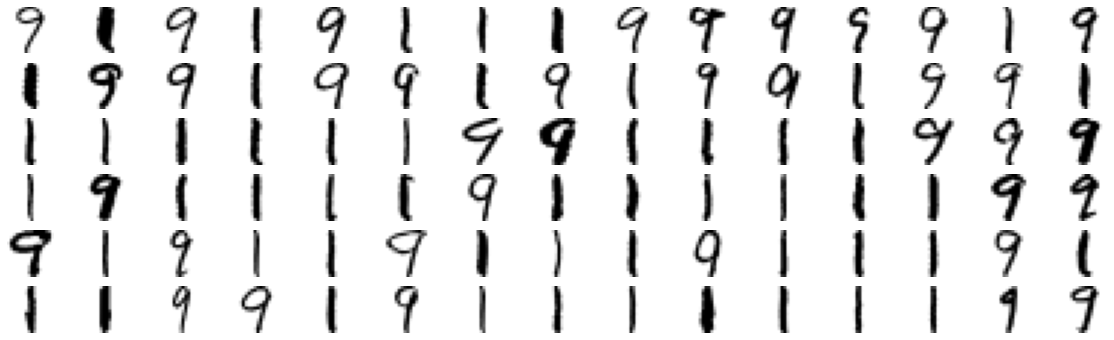

In [5]:
show_numbers(X_train)

# Implement Logistic Regression
Implement Logistic Regression, do gradient descent until training converges (find a good criterion for when that is the case yourself) and test the accuracy on your test data.

In [6]:
# Logistic Regression
class LogisticRegression:
    '''
    An object for training a logistic regression model
    :param eps: The convergence criterion for gradient descent optimization
    :type eps: float
    :param learning_rate: Scalar for the stepsize of the gradient descent
    :type learning_rate: float
    :param decision_boundary: Scalar as a cutoff for classifying into classes
    :type decision_boundary: float
    '''
    def __init__(self, eps=0.001, learning_rate=0.01, decision_boundary=0.5):
        self.loss_plotlist = None
        self.w = None
        self.b = None
        self.eps = eps #gradient descent cutoff
        self.learning_rate = learning_rate #gradient descent
        self.decision_boundary = decision_boundary
    
    def _sigmoidal(self, X, w, b):
        """Implements the logistic function for given X, weights w and bias b."""
        return 1 / (1 + np.exp(-1 * (np.dot(X, w) + b)))
    
    def _cross_entopy_loss_mean(self, y_hat, y):
        """Computes the mean loss of y vs the sigmoidal y_hat."""
        return np.mean(- y * np.log(y_hat) - (1-y) * np.log(1 - y_hat))
        
    def _cross_entopy_loss_w_mean_gradient(self, X, y_hat, y):
        """Computes the mean loss gradient of y vs the sigmoidal y_hat, 
        by deriving the cross entropy loss function by w."""
        return np.mean(np.dot(X.T, (y - y_hat)), axis=0)
    
    def _cross_entopy_loss_b_mean_gradient(self, y_hat, y):
        """Computes the mean loss gradient of y vs the sigmoidal y_hat, 
        by deriving the cross entropy loss function by b."""
        return np.mean((y - y_hat), axis=0)
    
    def fit(self, X, y):
        """Using Data X and Labels y, computes the optimal weights w and bias b. 
        Convergence is reached, when the change of w and b between iteration is smaller than self.eps."""
        self.loss_plotlist = []
        w_curr, w_last = np.zeros(X.shape[1]), np.full(X.shape[1], np.inf)
        b_curr, b_last = 0, np.inf
        while np.absolute(w_curr - w_last).mean() > self.eps and np.absolute(b_curr - b_last).mean() > self.eps:
            y_hat = self._sigmoidal(X, w_curr, b_curr)
            w_mean_gradient = self._cross_entopy_loss_w_mean_gradient(X, y_hat, y)
            b_mean_gradient = self._cross_entopy_loss_b_mean_gradient(y_hat, y)
            w_last = w_curr
            b_last = b_curr
            # not sure here, x(t+1) = −𝜂∇𝑓(x(t)) according to the slides
            # intuitively, i would have said its x(t+1) = x(t) − 𝜂∇𝑓(x(t)), but that just goes off to infinity
            w_curr = w_curr - self.learning_rate * w_mean_gradient
            b_curr = b_curr - self.learning_rate * b_mean_gradient
            self.loss_plotlist.append(self._cross_entopy_loss_mean(y_hat, y))
#             print(w_curr-w_last)
            if len(self.loss_plotlist) > 100:
                break
        self.w = w_curr
        self.b = b_curr

    def plot_loss(self):
        """Plots the mean cross entropy loss value per iteration."""
        if self.loss_plotlist == None:
            raise Exception("This Logistic Regression Object is not trained yet! Call the 'fit' function first!")
        else:
            plt.plot(np.arange(len(self.loss_plotlist)), self.loss_plotlist)
            plt.xlabel('Iteration')
            plt.ylabel('Cross Entropy Loss')
            plt.show()
    
    def predict_proba(self, X_new):
        """Predicts y values for a given set of points in X_new as continuous values."""
        if list(self.w) == None and self.b == None:
            raise Exception("This Logistic Regression Object is not trained yet! Call the 'fit' function first!")
        else:
            y = self._sigmoidal(X_new, self.w, self.b)
        return y
    
    def predict(self, X_new):
        """Predicts y values for a given set of points in X_new as categorical values."""
        if list(self.w) == None and self.b == None:
            raise Exception("This Logistic Regression Object is not trained yet! Call the 'fit' function first!")
        else:
            y = np.where(self._sigmoidal(X_new, self.w, self.b) > self.decision_boundary, 1, 0)
        return y
    
    def accuray(self, y_hat, y):
        """Print the accuracy between predicted and actual labels."""
        print('Accuracy: {:f}%'.format(y_hat[np.where(y_hat==y)].shape[0]/y_hat.shape[0]))
        return None

In [7]:
logit_cross_entropy = LogisticRegression()
logit_cross_entropy.fit(X_train, y_train)

/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


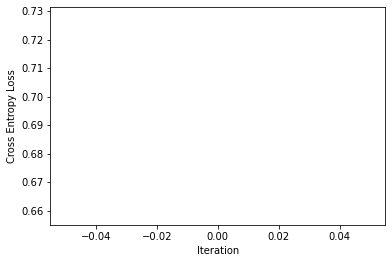

[0.6931471805599454,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf]

In [8]:
logit_cross_entropy.plot_loss()
logit_cross_entropy.loss_plotlist

In [66]:
y_hat = logit_cross_entropy.predict(X_test)
print(y_hat)
logit_cross_entropy.accuray(y_hat,y_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy: 0.000000%


Logistic Regression can be interpreted as a neural network with just a single layer. It uses the Cross Entropy to measure the performance of the layer (i.e. of the "trained" weight **w**). In ML we call this the **Loss function**. 

What happens when you take the Means Squared Error (MSE) instead of the Cross Entropy? Does this also work? Implement MSE and try for yourself.


(Optional) Can you think of a way to classify more than one class (in this case 10 classes)? How would you change the way **w** is defined?